Regression Equation: dist = 0.01 * mode_fDelT + -1.00


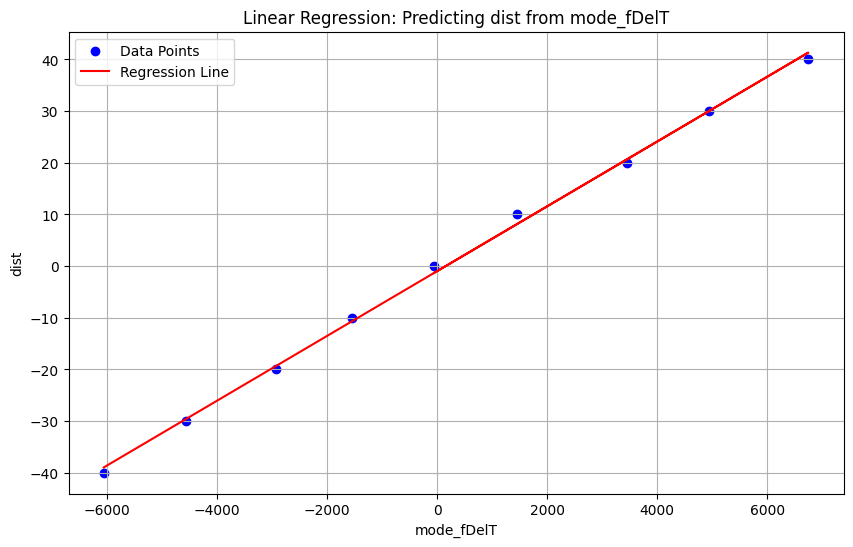

In [1]:
import pandas as pd
import numpy as np
import glob
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# List of CSV files
csv_files = [
    'Data_0.csv', 'Data_+10.csv', 'Data_+20.csv', 'Data_+30.csv', 'Data_+40.csv',
    'Data_-10.csv', 'Data_-20.csv', 'Data_-30.csv', 'Data_-40.csv'
]

# Initialize arrays to store data for linear regression
independent_feature = []
dependent_feature = []

# Load data and populate arrays
for file in csv_files:
    dist = int(file.split('_')[-1].split('.')[0])  # Extract the 'dist' value from the file name
    data = pd.read_csv(file)
    mode_fDelT = data['corrected'].mode().iloc[0]  # Get the mode of the 'fDelT' column
    
    independent_feature.append(mode_fDelT)
    dependent_feature.append(dist)

# Reshape the data arrays
independent_feature = np.array(independent_feature).reshape(-1, 1)
dependent_feature = np.array(dependent_feature)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(independent_feature, dependent_feature)

# Get the slope (coefficient) and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Print the equation of the regression line
equation = f'dist = {slope:.2f} * mode_fDelT + {intercept:.2f}'
print('Regression Equation:', equation)

# Create a scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(independent_feature, dependent_feature, color='blue', label='Data Points')
plt.plot(independent_feature, model.predict(independent_feature), color='red', label='Regression Line')
plt.title('Linear Regression: Predicting dist from mode_fDelT')
plt.xlabel('mode_fDelT')
plt.ylabel('dist')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the trained linear regression model (replace with your trained model)
# model = load_model('path_to_your_trained_model')

# Test file names
test_files = ['Data_+45.csv', 'Data_-45.csv']

# Initialize arrays to store data for prediction
mode_fDelT_test = []

# Load data and populate arrays
for file in test_files:
    data = pd.read_csv(file)
    mode_fDelT = data['corrected'].mode().iloc[0]  # Get the mode of the 'fDelT' column
    
    mode_fDelT_test.append(mode_fDelT)

# Reshape the data array
mode_fDelT_test = np.array(mode_fDelT_test).reshape(-1, 1)

# Predict dist using the trained model
predicted_dist = model.predict(mode_fDelT_test)

# Print the predicted dist values for each test file
for i, file in enumerate(test_files):
    print(f"Test File: {file}, Predicted dist: {predicted_dist[i]:.2f}")


Test File: Data_+45.csv, Predicted dist: 41.32
Test File: Data_-45.csv, Predicted dist: -42.43


Regression Equation (Polynomial): dist = -0.00 * mode_fDelT^2 + 0.01 * mode_fDelT + -0.07


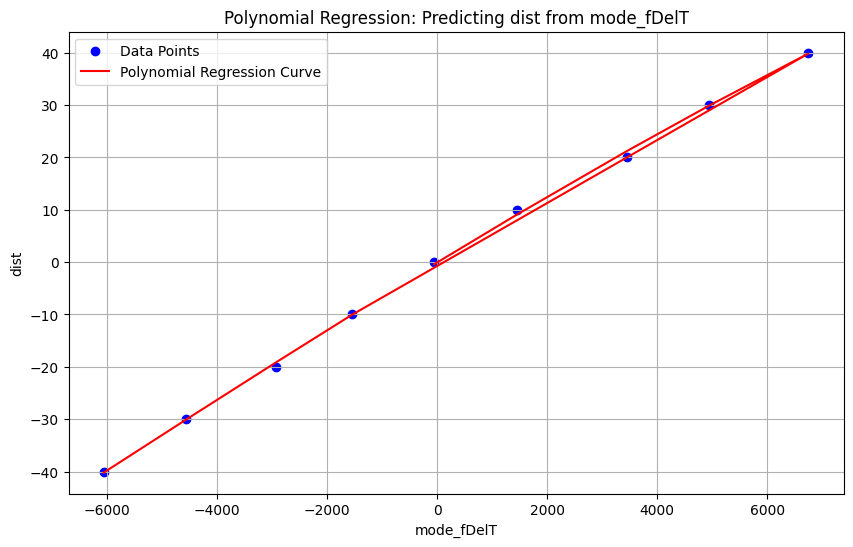

In [3]:
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# List of CSV files
csv_files = [
    'Data_0.csv', 'Data_+10.csv', 'Data_+20.csv', 'Data_+30.csv', 'Data_+40.csv',
    'Data_-10.csv', 'Data_-20.csv', 'Data_-30.csv', 'Data_-40.csv'
]

# Initialize arrays to store data for polynomial regression
independent_feature = []
dependent_feature = []

# Load data and populate arrays
for file in csv_files:
    dist = int(file.split('_')[-1].split('.')[0])  # Extract the 'dist' value from the file name
    data = pd.read_csv(file)
    mode_fDelT = data['corrected'].mode().iloc[0]  # Get the mode of the 'fDelT' column
    
    independent_feature.append(mode_fDelT)
    dependent_feature.append(dist)

# Reshape the data arrays
independent_feature = np.array(independent_feature).reshape(-1, 1)
dependent_feature = np.array(dependent_feature)

# Apply polynomial features
poly_features = PolynomialFeatures(degree=3)  # You can adjust the degree as needed
independent_feature_poly = poly_features.fit_transform(independent_feature)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(independent_feature_poly, dependent_feature)

# Print the equation of the polynomial regression curve
equation = f'dist = {poly_model.coef_[2]:.2f} * mode_fDelT^2 + {poly_model.coef_[1]:.2f} * mode_fDelT + {poly_model.intercept_:.2f}'
print('Regression Equation (Polynomial):', equation)

# Create a scatter plot with the polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(independent_feature, dependent_feature, color='blue', label='Data Points')
plt.plot(independent_feature, poly_model.predict(independent_feature_poly), color='red', label='Polynomial Regression Curve')
plt.title('Polynomial Regression: Predicting dist from mode_fDelT')
plt.xlabel('mode_fDelT')
plt.ylabel('dist')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# Test file names
test_files = ['Data_+45.csv', 'Data_-45.csv']

# Initialize arrays to store data for prediction
mode_fDelT_test = []

# Load data and populate arrays
for file in test_files:
    data = pd.read_csv(file)
    mode_fDelT = data['corrected'].mode().iloc[0]  # Get the mode of the 'fDelT' column
    
    mode_fDelT_test.append(mode_fDelT)

# Reshape the data array
mode_fDelT_test = np.array(mode_fDelT_test).reshape(-1, 1)

# Apply polynomial features to test data
independent_feature_poly_test = poly_features.transform(mode_fDelT_test)

# Predict dist using the trained polynomial regression model
predicted_dist = poly_model.predict(independent_feature_poly_test)

# Print the predicted dist values for each test file
for i, file in enumerate(test_files):
    print(f"Test File: {file}, Predicted dist: {predicted_dist[i]:.2f}")


Test File: Data_+45.csv, Predicted dist: 39.81
Test File: Data_-45.csv, Predicted dist: -43.90


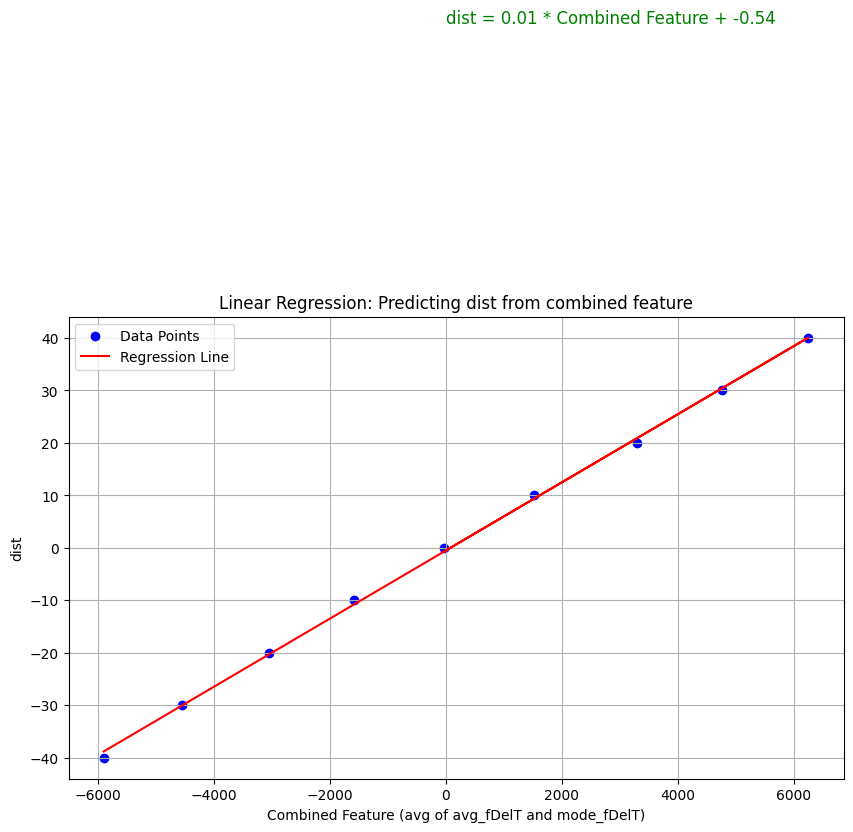

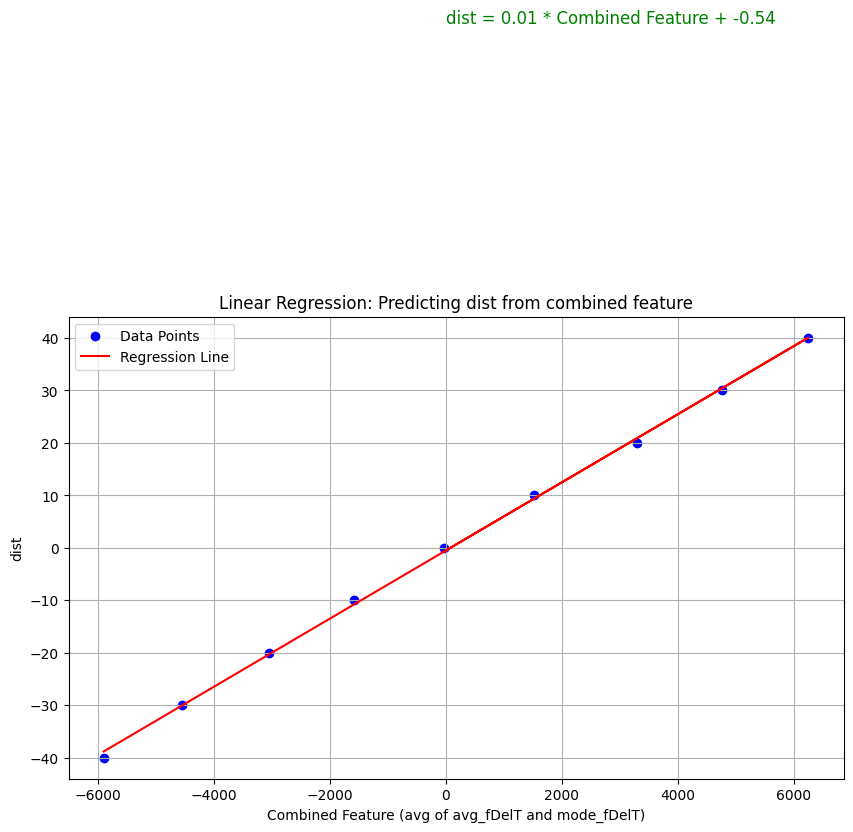

In [5]:
import pandas as pd
import numpy as np
import glob
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# List of CSV files
csv_files = [
    'Data_0.csv', 'Data_+10.csv', 'Data_+20.csv', 'Data_+30.csv', 'Data_+40.csv',
    'Data_-10.csv', 'Data_-20.csv', 'Data_-30.csv', 'Data_-40.csv'
]
# Initialize arrays to store data for linear regression
combined_feature = []
dist_data = []

# Load data and populate arrays
for file in csv_files:
    dist = int(file.split('_')[-1].split('.')[0])  # Extract the 'dist' value from the file name
    data = pd.read_csv(file)
    
    avg_fDelT = data['corrected'].mean()
    mode_fDelT = data['corrected'].mode().iloc[0]
    
    combined_feature.append((avg_fDelT + mode_fDelT) / 2)  # Taking the average of avg and mode
    dist_data.append(dist)

# Convert arrays to numpy arrays
combined_feature = np.array(combined_feature).reshape(-1, 1)
dist_data = np.array(dist_data)

# Create and fit the linear regression model
model_combined = LinearRegression()
model_combined.fit(combined_feature, dist_data)

# Get the slope (coefficient) and intercept of the regression line
slope = model_combined.coef_[0]
intercept = model_combined.intercept_

# Create a scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(combined_feature, dist_data, color='blue', label='Data Points')
plt.plot(combined_feature, model_combined.predict(combined_feature), color='red', label='Regression Line')
plt.title('Linear Regression: Predicting dist from combined feature')
plt.xlabel('Combined Feature (avg of avg_fDelT and mode_fDelT)')
plt.ylabel('dist')
plt.legend()

# Print the equation of the regression line on the plot
equation = f'dist = {slope:.2f} * Combined Feature + {intercept:.2f}'
plt.text(0.4, 100, equation, fontsize=12, color='green')

plt.grid(True)
plt.show()
import pandas as pd
import numpy as np
import glob
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# List of CSV files
csv_files = [
    'Data_0.csv', 'Data_+10.csv', 'Data_+20.csv', 'Data_+30.csv', 'Data_+40.csv',
    'Data_-10.csv', 'Data_-20.csv', 'Data_-30.csv', 'Data_-40.csv'
]

# Initialize arrays to store data for linear regression
combined_feature = []
dist_data = []

# Load data and populate arrays
for file in csv_files:
    dist = int(file.split('_')[-1].split('.')[0])  # Extract the 'dist' value from the file name
    data = pd.read_csv(file)
    
    avg_fDelT = data['corrected'].mean()
    mode_fDelT = data['corrected'].mode().iloc[0]
    
    combined_feature.append((avg_fDelT + mode_fDelT) / 2)  # Taking the average of avg and mode
    dist_data.append(dist)

# Convert arrays to numpy arrays
combined_feature = np.array(combined_feature).reshape(-1, 1)
dist_data = np.array(dist_data)

# Create and fit the linear regression model
model_combined = LinearRegression()
model_combined.fit(combined_feature, dist_data)

# Get the slope (coefficient) and intercept of the regression line
slope = model_combined.coef_[0]
intercept = model_combined.intercept_

# Create a scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(combined_feature, dist_data, color='blue', label='Data Points')
plt.plot(combined_feature, model_combined.predict(combined_feature), color='red', label='Regression Line')
plt.title('Linear Regression: Predicting dist from combined feature')
plt.xlabel('Combined Feature (avg of avg_fDelT and mode_fDelT)')
plt.ylabel('dist')
plt.legend()

# Print the equation of the regression line on the plot
equation = f'dist = {slope:.2f} * Combined Feature + {intercept:.2f}'
plt.text(0.4, 100, equation, fontsize=12, color='green')

plt.grid(True)
plt.show()


In [6]:
# Test file names
test_files = ['Data_+45.csv', 'Data_-45.csv']

# Initialize arrays to store data for prediction
combined_feature_test = []

# Load data and populate arrays
for file in test_files:
    data = pd.read_csv(file)
    avg_fDelT = data['corrected'].mean()
    mode_fDelT = data['corrected'].mode().iloc[0]
    
    combined_feature_test.append((avg_fDelT + mode_fDelT) / 2)

# Reshape the data array
combined_feature_test = np.array(combined_feature_test).reshape(-1, 1)

# Predict dist using the trained linear regression model
predicted_dist = model_combined.predict(combined_feature_test)

# Print the predicted dist values for each test file
for i, file in enumerate(test_files):
    print(f"Test File: {file}, Predicted dist: {predicted_dist[i]:.2f}")


Test File: Data_+45.csv, Predicted dist: 41.39
Test File: Data_-45.csv, Predicted dist: -41.86


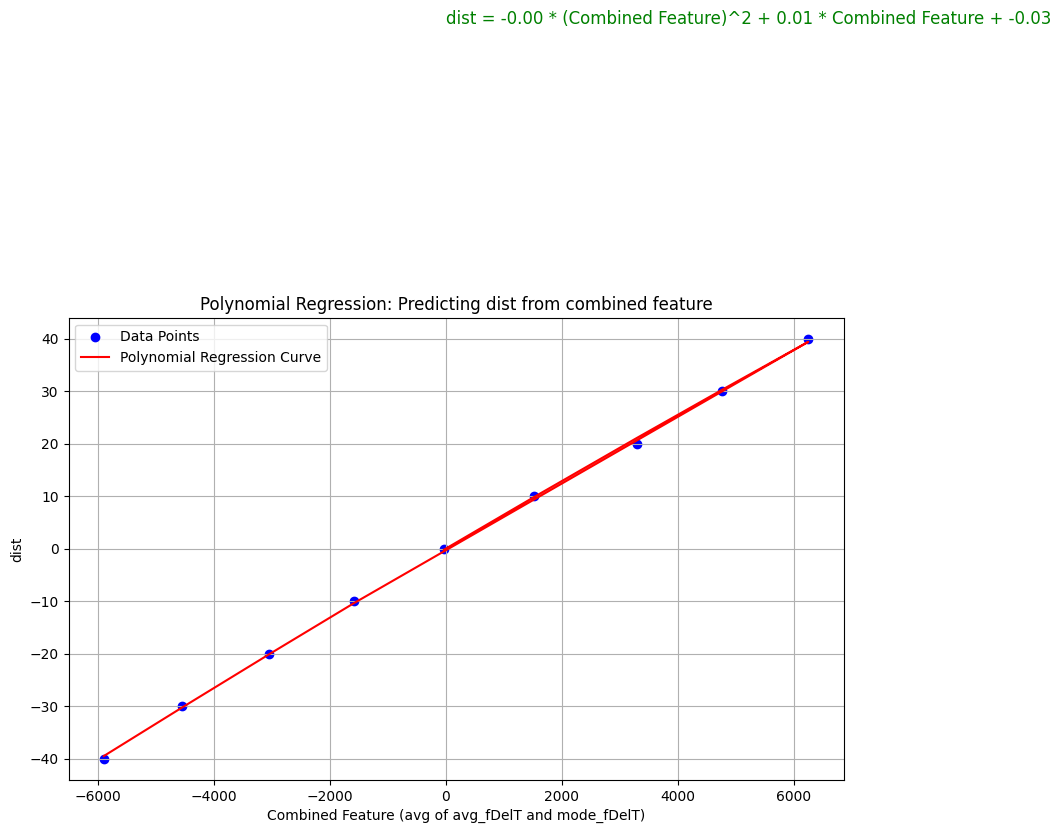

In [13]:
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# List of CSV files
csv_files = [
    'Data_0.csv', 'Data_+10.csv', 'Data_+20.csv', 'Data_+30.csv', 'Data_+40.csv',
    'Data_-10.csv', 'Data_-20.csv', 'Data_-30.csv', 'Data_-40.csv'
]

# Initialize arrays to store data for polynomial regression
combined_feature = []
dist_data = []

# Load data and populate arrays
for file in csv_files:
    dist = int(file.split('_')[-1].split('.')[0])  # Extract the 'dist' value from the file name
    data = pd.read_csv(file)
    
    avg_fDelT = data['corrected'].mean()
    mode_fDelT = data['corrected'].mode().iloc[0]
    
    combined_feature.append((avg_fDelT + mode_fDelT) / 2)  # Taking the average of avg and mode
    dist_data.append(dist)

# Convert arrays to numpy arrays
combined_feature = np.array(combined_feature).reshape(-1, 1)
dist_data = np.array(dist_data)

# Apply polynomial features
poly_features = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
combined_feature_poly = poly_features.fit_transform(combined_feature)

# Create and fit the polynomial regression model
poly_model_combined = LinearRegression()
poly_model_combined.fit(combined_feature_poly, dist_data)

# Get the coefficients of the polynomial regression model
coefficients = poly_model_combined.coef_
intercept = poly_model_combined.intercept_

# Create a scatter plot with the polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(combined_feature, dist_data, color='blue', label='Data Points')
plt.plot(combined_feature, poly_model_combined.predict(combined_feature_poly), color='red', label='Polynomial Regression Curve')
plt.title('Polynomial Regression: Predicting dist from combined feature')
plt.xlabel('Combined Feature (avg of avg_fDelT and mode_fDelT)')
plt.ylabel('dist')
plt.legend()

# Print the equation of the polynomial regression curve on the plot
equation = f'dist = {coefficients[2]:.2f} * (Combined Feature)^2 + {coefficients[1]:.2f} * Combined Feature + {intercept:.2f}'
plt.text(1.5, 100, equation, fontsize=12, color='green')

plt.grid(True)
plt.show()


In [14]:
# Test file names
test_files = ['Data_+45.csv', 'Data_-45.csv']

# Initialize arrays to store data for prediction
combined_feature_test = []

# Load data and populate arrays
for file in test_files:
    data = pd.read_csv(file)
    avg_fDelT = data['corrected'].mean()
    mode_fDelT = data['corrected'].mode().iloc[0]
    
    combined_feature_test.append((avg_fDelT + mode_fDelT) / 2)

# Reshape the data array
combined_feature_test = np.array(combined_feature_test).reshape(-1, 1)

# Apply polynomial features to test data
combined_feature_poly_test = poly_features.transform(combined_feature_test)

# Predict dist using the trained polynomial regression model
predicted_dist = poly_model_combined.predict(combined_feature_poly_test)

# Print the predicted dist values for each test file
for i, file in enumerate(test_files):
    print(f"Test File: {file}, Predicted dist: {predicted_dist[i]:.2f}")


Test File: Data_+45.csv, Predicted dist: 40.61
Test File: Data_-45.csv, Predicted dist: -42.74


Equation: dist = -0.00000 * (Combined Feature)^2 + 0.00000 * Combined Feature + 0.24


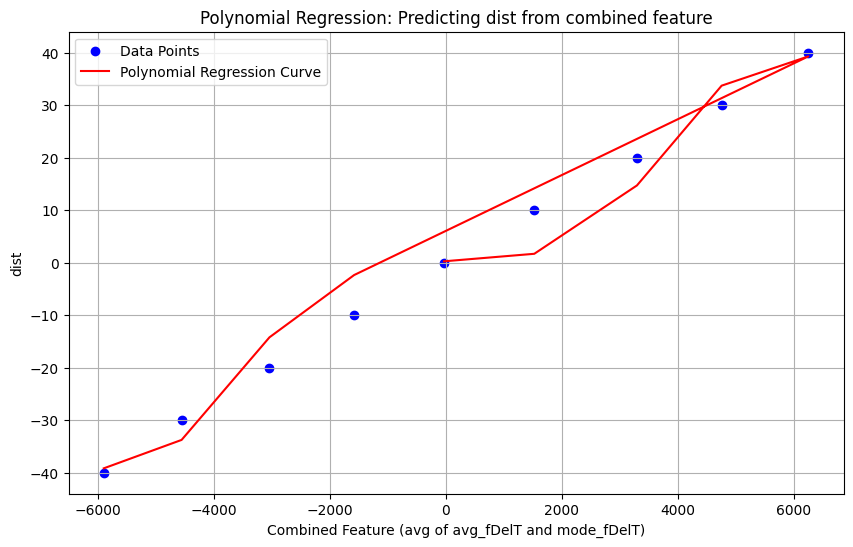

In [17]:
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# List of CSV files
csv_files = [
    'Data_0.csv', 'Data_+10.csv', 'Data_+20.csv', 'Data_+30.csv', 'Data_+40.csv',
    'Data_-10.csv', 'Data_-20.csv', 'Data_-30.csv', 'Data_-40.csv'
]

# Initialize arrays to store data for polynomial regression
combined_feature = []
dist_data = []

# Load data and populate arrays
for file in csv_files:
    dist = int(file.split('_')[-1].split('.')[0])  # Extract the 'dist' value from the file name
    data = pd.read_csv(file)
    
    avg_fDelT = data['corrected'].mean()
    mode_fDelT = data['corrected'].mode().iloc[0]
    
    combined_feature.append((avg_fDelT + mode_fDelT) / 2)  # Taking the average of avg and mode
    dist_data.append(dist)

# Convert arrays to numpy arrays
combined_feature = np.array(combined_feature).reshape(-1, 1)
dist_data = np.array(dist_data)

# Apply polynomial features
poly_features = PolynomialFeatures(degree=5)  # You can adjust the degree as needed
combined_feature_poly = poly_features.fit_transform(combined_feature)

# Create and fit the polynomial regression model
poly_model_combined = LinearRegression()
poly_model_combined.fit(combined_feature_poly, dist_data)

# Get the coefficients of the polynomial regression model
coefficients = poly_model_combined.coef_
intercept = poly_model_combined.intercept_

# Print the equation of the polynomial regression curve
equation = f'Equation: dist = {coefficients[2]:.5f} * (Combined Feature)^2 + {coefficients[1]:.5f} * Combined Feature + {intercept:.2f}'
print(equation)

# Create a scatter plot with the polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(combined_feature, dist_data, color='blue', label='Data Points')
plt.plot(combined_feature, poly_model_combined.predict(combined_feature_poly), color='red', label='Polynomial Regression Curve')
plt.title('Polynomial Regression: Predicting dist from combined feature')
plt.xlabel('Combined Feature (avg of avg_fDelT and mode_fDelT)')
plt.ylabel('dist')
plt.legend()
plt.grid(True)
plt.show()


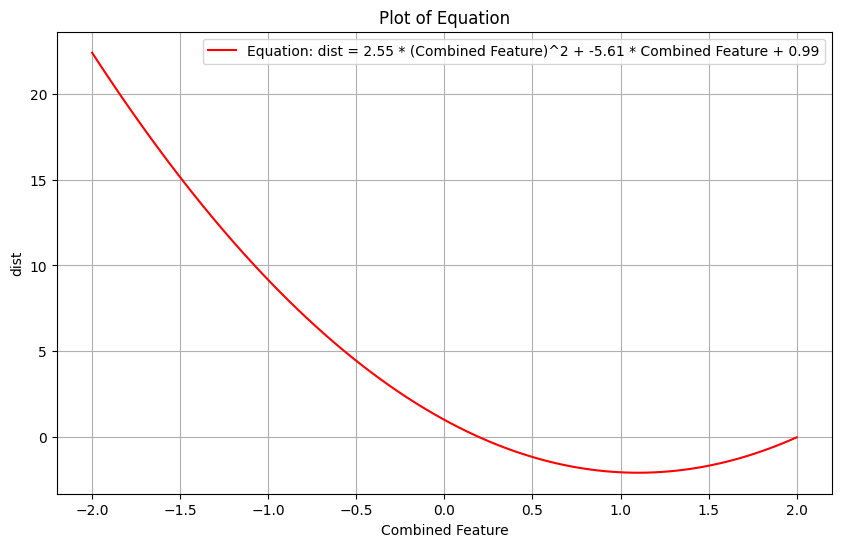

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data points
combined_feature = np.linspace(-2, 2, 100)
dist = 2.55 * combined_feature**2 + -5.61 * combined_feature + 0.99

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(combined_feature, dist, color='red', label='Equation: dist = 2.55 * (Combined Feature)^2 + -5.61 * Combined Feature + 0.99')
plt.title('Plot of Equation')
plt.xlabel('Combined Feature')
plt.ylabel('dist')
plt.legend()
plt.grid(True)
plt.show()
